In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

In [ ]:
df = pd.read_csv("/Users/jay/Work/stpw/datasets/.ipynb_checkpoints/datas-checkpoint.csv")
df['input'] = df['input'].apply(eval)

all_instructions = [item for sublist in df['input'] for item in sublist]

encoder = LabelEncoder()
encoder.fit(all_instructions)
df['encoded_input'] = df['input'].apply(lambda x: encoder.transform(x).tolist())

max_length = max(df['encoded_input'].apply(len))
X = pad_sequences(df['encoded_input'], padding='post', maxlen=max_length)

y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = Sequential([
    Embedding(input_dim=len(encoder.classes_), output_dim=64, input_length=max_length),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary() 
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy[1] * 100:.2f}%")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 16, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,279 (149.53 KB)

 Trainable params: 38,279 (149.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8805 - loss: 0.3295 - val_accuracy: 1.0000 - val_loss: 5.5370e-05
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 1.0000 - loss: 2.0068e-04 - val_accuracy: 1.0000 - val_loss: 9.9606e-06
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 1.0000 - loss: 4.9501e-05 - val_accuracy: 1.0000 - val_loss: 2.4656e-06
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 2.0317e-05 - val_accuracy: 1.0000 - val_loss: 8.4417e-07
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 8.1091e-06 - val_accuracy: 1.0000 - val_loss: 3.2802e-07
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 3.4617e-06 - val_accuracy: 1.0000 - val_loss: 1.0287e-07
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9906 - loss: 0.0506 - val_accuracy: 1.0000 - val_loss: 1.8280e-05
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy[1] * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.2010e-07
Test Accuracy: 100.00%


In [28]:
new_code = [[sub', 'str', 'mov', 'str', 'mov', 'str', 'b', 'ldr', 'subs', 'cset', 'tbnz', 'b', 'mov', 'str', 'b', 'ldr', 'subs', 'cset', 'tbnz', 'b', 'mov', 'str', 'b', 'ldr', 'subs', 'b', 'ldr', 'add', 'ret']

encoded_new_code = encoder.transform(new_code).tolist()
padded_new_code = pad_sequences([encoded_new_code], padding='post', maxlen=max_length)


predicted_snippet = model.predict(padded_new_code)
predicted_class = np.argmax(predicted_snippet)

snippet_labels = ["ari_snippet", "if_ari_snippet", "for_ari_snippet", "if_if_ari_snippet", 
                  "if_for_ari_snippet", "for_if_ari_snippet", "for_for_ari_snippet"]
print(predicted_snippet)
print(predicted_class)
print(f"Predicted Snippet Type: {snippet_labels[predicted_class]}")


SyntaxError: invalid syntax (763096314.py, line 1)

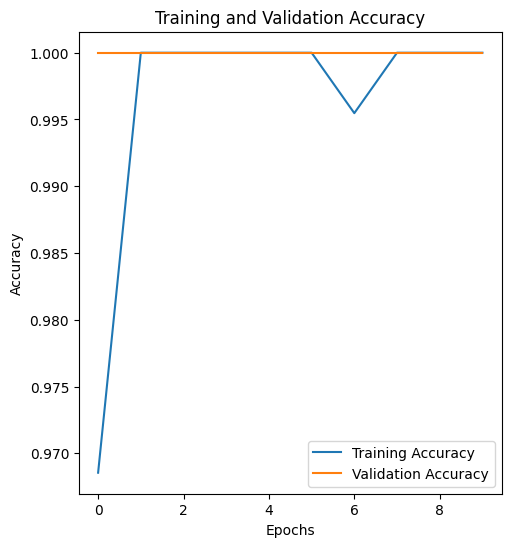

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

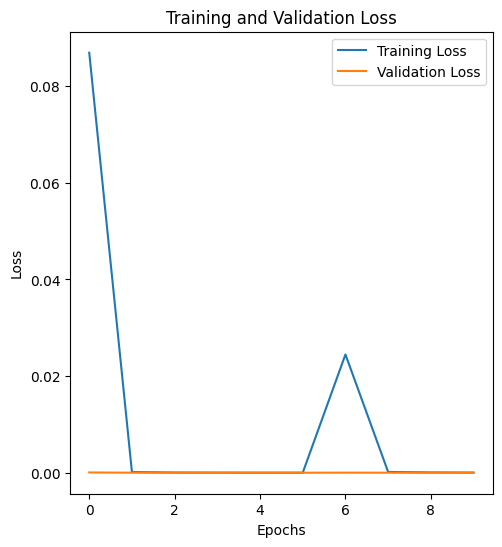

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
